# Classification using Support Vector Machines

In [1]:
#python >=3.5 is required
import sys
assert sys.version_info >= (3,5)

#scikit-learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#common imports
import numpy as np
import os
import pandas as pd

#to make this notebook's output stable across runs
np.random.seed(42)

#to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [2]:
#saving figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=200):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi = resolution)

## Linearly separable case (optimal margin classifier)

In [3]:
from sklearn import datasets

In [4]:
iris_frame = datasets.load_iris(as_frame=True)

In [5]:
df = iris_frame.data
df['target'] = iris_frame.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
print(iris_frame.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
import seaborn as sns
sns.set_theme()

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

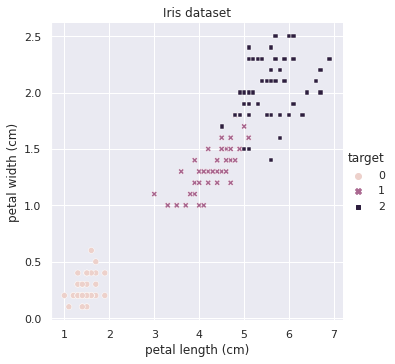

In [8]:
sns.relplot(data=df, x='petal length (cm)', y ='petal width (cm)', hue='target', style='target')
plt.title('Iris dataset')
plt.show()

In [18]:
X = iris_frame.data.values[:,(2,3)] #petal length, petal width
y = iris_frame.data.values[:, 4]

In [19]:
X.shape

(150, 2)

In [21]:
setosa_or_versi = (y==0) | (y == 1) #mask for making target binary instead of ternary
X = X[setosa_or_versi]
y = y[setosa_or_versi]

In [26]:
np.unique(y)

array([0., 1.])

In [31]:
arr = np.where(y == 0, 'Iris Setosa', 'Iris Versicolor')

(100,)

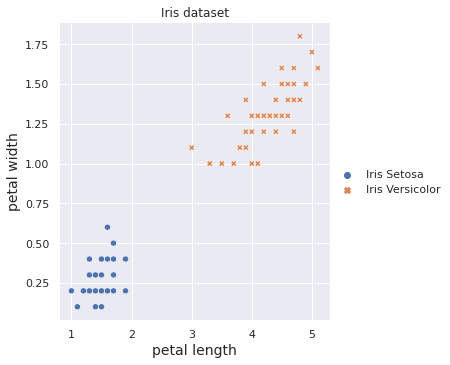

In [32]:
sns.relplot(x = X[:, 0], y = X[:, 1] , hue=arr, style=arr)
plt.xlabel('petal length', fontsize = 14)
plt.ylabel('petal width', fontsize = 14)
plt.title('Iris dataset')
plt.show()

Matplotlib code to generate the same image as above
```
fig,axes = plt.subplots(figsize = (10,3))
axes.plot(X[:, 0][y==1], X[:,1][y==1], "g^", label="Iris virginica")
axes.plot(X[:, 1][y==0], X[:,1][y==0], "bs", label="Iriis versicolor")
plt.xlabel('petal length', fontsize = 14)
plt.ylabel('petal width', fontsize = 14)
plt.legend()
```

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [36]:
C = 5
alpha = 1/(C*len(X))

In [66]:
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                       max_iter = 1000, tol=1e-3, random_state = 42)

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
lin_clf.fit(X_scaled,y)
svm_clf.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

print("LinearSVC:         ", lin_clf.intercept_, lin_clf.coef_)
print("SVM classifer:     ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifer:      ", sgd_clf.intercept_, sgd_clf.coef_)


LinearSVC:          [0.28475098] [[1.05364854 1.09903804]]
SVM classifer:      [0.31896852] [[1.1203284  1.02625193]]
SGDClassifer:       [0.117] [[0.77714169 0.72981762]]


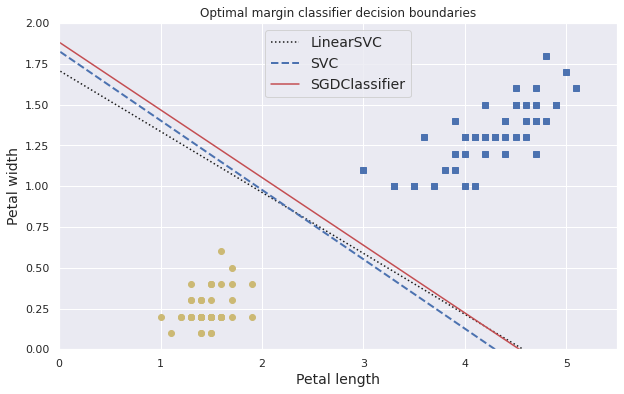

In [83]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(10,6))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.title('Optimal margin classifier decision boundaries')
plt.show()

## Non-linear separation case (optimal margin classifer + Kernels = SVM)

In [85]:
X = iris_frame.data.values[:,(2,3)] #petal length, petal width
y = iris_frame.data.values[:, 4]

In [86]:
setosa_or_versi = (y==1) | (y == 2) #mask for making target binary instead of ternary
X = X[setosa_or_versi]
y = y[setosa_or_versi]

In [87]:
arr = np.where(y == 1, 'Iris Versicolor', 'Iris Virginica')

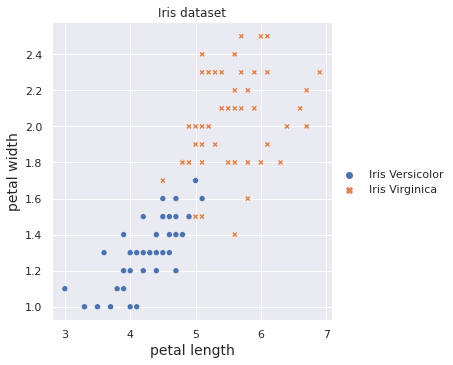

In [88]:
sns.relplot(x = X[:, 0], y = X[:, 1] , hue=arr, style=arr)
plt.xlabel('petal length', fontsize = 14)
plt.ylabel('petal width', fontsize = 14)
plt.title('Iris dataset')
plt.show()

In [94]:
svm_clf = SVC(kernel="rbf", gamma=5, C=0.001)

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
svm_clf.fit(X_scaled,y)

SVC(C=0.001, gamma=5)

In [134]:
axis = [-1.5, 2.5, -1, 1.5]

In [135]:
x0s = np.linspace(axis[0], axis[1], 100)
x1s = np.linspace(axis[2], axis[3], 100)
x0,x1 = np.meshgrid(x0s, x1s)


In [136]:
x0.shape

(100, 100)

In [137]:
f = np.c_[x0.ravel(), x1.ravel()]
y_pred = svm_clf.predict(f).reshape(x0.shape)
y_decision = svm_clf.decision_function(f).reshape(x0.shape)

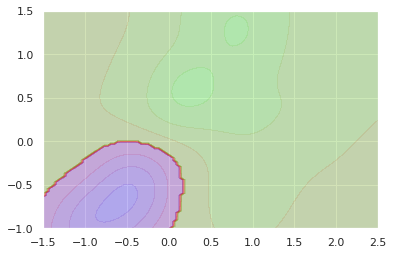

In [148]:
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plt.show()